In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Question 4

In [2]:
# load data:
df1 = pd.read_excel('Selected 1.xlsx')

df2 = pd.read_excel('Selected 2.xlsx')

df3 = pd.read_excel('Selected 3.xlsx')

df4 = pd.read_excel('Selected 4.xlsx')

df5 = pd.read_excel('Selected 5.xlsx')

df6 = pd.read_excel('Selected 6.xlsx')

df7 = pd.read_excel('Selected 7.xlsx')

df8 = pd.read_excel('Selected 8.xlsx')

df9 = pd.read_excel('Selected 9.xlsx')

df10 = pd.read_excel('Selected 10.xlsx')

record_dates = ['1/6/2025', '1/7/2025', '1/8/2025', '1/9/2025', '1/10/2025', '1/13/2025', '1/14/2025', '1/15/2025', '1/16/2025', '1/17/2025']

## Question 4a

In [3]:
# Define dirty price
def dirty_price(maturity_date, coupon_start_date, record_date, coupon_rate, clean_price):
    """
    This function calculate the dirty price of the chosen bond
    
    All date in MM/DD/YYYY format
    """
    face_value = 100
    
    maturity_date = pd.Timestamp(maturity_date)
    coupon_start_date = pd.Timestamp(coupon_start_date)
    record_date = pd.Timestamp(record_date)
    
    last_coupon_date = coupon_start_date
    while (last_coupon_date + pd.DateOffset(months = 6)) <= record_date:
        last_coupon_date += pd.DateOffset(months = 6)
        
    days_since_last_coupon = (record_date - last_coupon_date).days
    
    accrued_interest = (days_since_last_coupon / 365) * coupon_rate * 100
    
    dirty_price = clean_price + accrued_interest
    
    return dirty_price

In [4]:
# Calculate dirty price
df1['Dirty prices'] = df1.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[0], row['Coupon rate'], row['Clean prices']), axis = 1)

df2['Dirty prices'] = df2.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[1], row['Coupon rate'], row['Clean prices']), axis = 1)

df3['Dirty prices'] = df3.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[2], row['Coupon rate'], row['Clean prices']), axis = 1)

df4['Dirty prices'] = df4.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[3], row['Coupon rate'], row['Clean prices']), axis = 1)

df5['Dirty prices'] = df5.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[4], row['Coupon rate'], row['Clean prices']), axis = 1)

df6['Dirty prices'] = df6.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[5], row['Coupon rate'], row['Clean prices']), axis = 1)

df7['Dirty prices'] = df7.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[6], row['Coupon rate'], row['Clean prices']), axis = 1)

df8['Dirty prices'] = df8.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[7], row['Coupon rate'], row['Clean prices ']), axis = 1)

df9['Dirty prices'] = df9.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[8], row['Coupon rate'], row['Clean prices']), axis = 1)

df10['Dirty prices'] = df10.apply(lambda row: dirty_price(row['Maturity date'], row['Coupon start date'], record_dates[9], row['Coupon rate'], row['Clean prices']), axis = 1)

In [5]:
# Define YTM calculation
def cashflow_time(record_date, maturity_date, coupon_start_date):
    """
    Find the exact time period of cash flows generated by a bond
    """
    record_date = pd.Timestamp(record_date)
    maturity_date = pd.Timestamp(maturity_date)
    coupon_start_date = pd.Timestamp(coupon_start_date)

    cashflow_dates = []

    next_coupon_date = coupon_start_date
    while next_coupon_date <= maturity_date:
        if next_coupon_date > record_date:
            cashflow_dates.append(next_coupon_date)
        next_coupon_date += pd.DateOffset(months=6)

    timing = [(date - record_date).days / 365.0 for date in cashflow_dates]
    
    return timing


def func(ytm, coupon_rate, timing, dprice):
    """
    Define the bond price function with respect to cash flows
    """
    face_value = 100
    
    coupon = (coupon_rate * face_value) / 2

    pv = sum(coupon / ((1 + ytm / 2) ** (2 * t)) for t in timing) + face_value / ((1 + ytm / 2) ** (2 * timing[-1]))

    return pv - dprice


def find_ytm(record_date, maturity_date, coupon_start_date, coupon_rate, dprice):
    """
    Find YTM using Newton's method
    """
    timing = cashflow_time(record_date, maturity_date, coupon_start_date)

    ytm_solution = fsolve(func, x0=0.03, args=(coupon_rate, timing, dprice))

    return ytm_solution[0]

In [6]:
# Calculate YTM
df1['YTM'] = df1.apply(lambda row: find_ytm(record_dates[0], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df2['YTM'] = df2.apply(lambda row: find_ytm(record_dates[1], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df3['YTM'] = df3.apply(lambda row: find_ytm(record_dates[2], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df4['YTM'] = df4.apply(lambda row: find_ytm(record_dates[3], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df5['YTM'] = df5.apply(lambda row: find_ytm(record_dates[4], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df6['YTM'] = df6.apply(lambda row: find_ytm(record_dates[5], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df7['YTM'] = df7.apply(lambda row: find_ytm(record_dates[6], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df8['YTM'] = df8.apply(lambda row: find_ytm(record_dates[7], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df9['YTM'] = df9.apply(lambda row: find_ytm(record_dates[8], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

df10['YTM'] = df10.apply(lambda row: find_ytm(record_dates[9], row['Maturity date'], row['Coupon start date'], row['Coupon rate'], row['Dirty prices']), axis = 1)

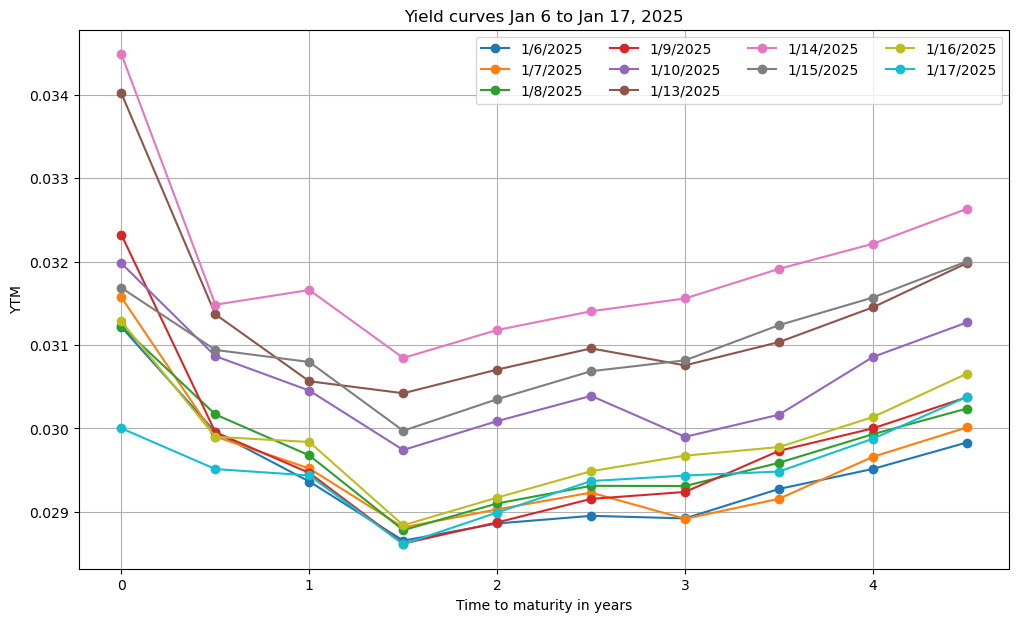

In [7]:
# Plotting YTM
YTM_combined = pd.concat([df1['YTM'], df2['YTM'], df3['YTM'], df4['YTM'], df5['YTM'], df6['YTM'], df7['YTM'], df8['YTM'], df9['YTM'], df10['YTM']], axis=1)

YTM_combined.columns = record_dates

x = list(np.arange(0, 5, 0.5))

plt.figure(figsize=(12, 7))
for date in YTM_combined.columns:
    plt.plot(x, YTM_combined[date], marker = 'o', linestyle='-', label = date)

plt.xlabel('Time to maturity in years')
plt.ylabel('YTM')
plt.title('Yield curves Jan 6 to Jan 17, 2025')
plt.legend(loc = 'upper right', fontsize = 10, ncol=4)
plt.grid(True)
plt.show()

## Question 4b

In [8]:
# Define the data sets
dic1 = df1.to_dict(orient='records')

dic2 = df2.to_dict(orient='records')

dic3 = df3.to_dict(orient='records')

dic4 = df4.to_dict(orient='records')

dic5 = df5.to_dict(orient='records')

dic6 = df6.to_dict(orient='records')

dic7 = df7.to_dict(orient='records')

dic8 = df8.to_dict(orient='records')

dic9 = df9.to_dict(orient='records')

dic10 = df10.to_dict(orient='records')

In [9]:
# Define spot function
def bootstrapping(data, record_date):
    """
    Bootstrapping to get the spot curve from the lecture.
    """
    face_value = 100
    
    record_date = pd.Timestamp(record_date)
    
    spot = {}
    
    for bond in data:
        maturity_date = bond['Maturity date']
        T = (maturity_date - record_date).days / 365
        dprice = bond['Dirty prices']
        coupon = bond['Coupon rate'] * 100 / 2
        
        if 0 <= T and T <= 1/2:
            r_T = -np.log((dprice / (100 + coupon))) / T
        
        elif T > 1/2:
            if T > 1 / 2 and T < 1:
                term = sum(coupon * np.exp(-spot[t] * t) for t in spot if round(t, 2) < 1/2)
                equation = lambda rT: dprice - (term + ((100 + coupon) * np.exp(-rT * T)))
                r_T = fsolve(equation, 0.05)[0]
                
            elif 1 <= T:
                term = sum(coupon * np.exp(-spot[t] * t) for t in spot if t < T and 1/2 <= t)
                equation = lambda rT: dprice - (term + ((100 + coupon) * np.exp(-rT * T)))
                r_T = fsolve(equation, 0.05)[0]
        spot[T] = r_T
    
    return spot

In [10]:
# Calculating spot rate
spot1 = pd.DataFrame(bootstrapping(dic1, record_dates[0]).values())

spot2 = pd.DataFrame(bootstrapping(dic2, record_dates[1]).values())

spot3 = pd.DataFrame(bootstrapping(dic3, record_dates[2]).values())

spot4 = pd.DataFrame(bootstrapping(dic4, record_dates[3]).values())

spot5 = pd.DataFrame(bootstrapping(dic5, record_dates[4]).values())

spot6 = pd.DataFrame(bootstrapping(dic6, record_dates[5]).values())

spot7 = pd.DataFrame(bootstrapping(dic7, record_dates[6]).values())

spot8 = pd.DataFrame(bootstrapping(dic8, record_dates[7]).values())

spot9 = pd.DataFrame(bootstrapping(dic9, record_dates[8]).values())

spot10 = pd.DataFrame(bootstrapping(dic10, record_dates[9]).values())

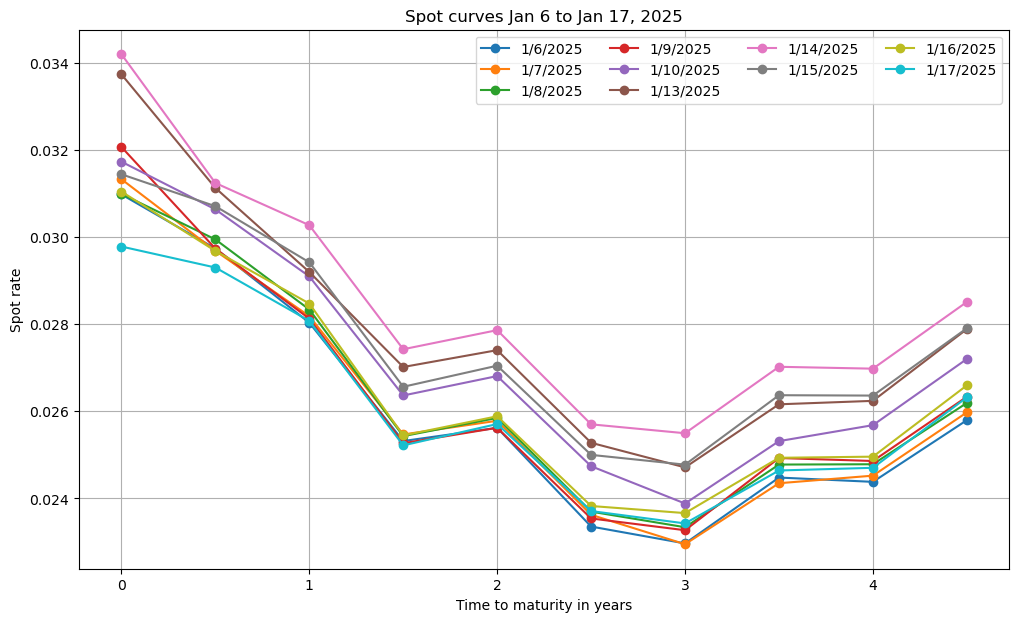

In [11]:
# Plotting spot curves
spot_combined = pd.concat([spot1, spot2, spot3, spot4, spot5, spot6, spot7, spot8, spot9, spot10], axis=1)

spot_combined.columns = record_dates

x = list(np.arange(0, 5, 0.5))

plt.figure(figsize=(12, 7))
for date in spot_combined.columns:
    plt.plot(x, spot_combined[date], marker = 'o', linestyle='-', label = date)

plt.xlabel('Time to maturity in years')
plt.ylabel('Spot rate')
plt.title('Spot curves Jan 6 to Jan 17, 2025')
plt.legend(loc = 'upper right', fontsize = 10, ncol=4)
plt.grid(True)
plt.show()

## Question 4c

In [12]:
# Define spot rates for integer years 1,2,3,4,5 using interpolation
def spot_int(df, record_date):
    """
    This function calculate the spot rate in integer year using interpolation
    method from the lecture
    """
    time_stamp = list(bootstrapping(df, record_date).keys())
    
    spots = bootstrapping(df, record_date)
    
    int_spot = {}
    
    int_spot['Year 1 spot rate'] = (spots[time_stamp[1]] + spots[time_stamp[2]]) / 2
    
    int_spot['Year 2 spot rate'] = (spots[time_stamp[4]] + spots[time_stamp[3]]) / 2
    
    int_spot['Year 3 spot rate'] = (spots[time_stamp[6]] + spots[time_stamp[5]]) / 2
    
    int_spot['Year 4 spot rate'] = (spots[time_stamp[8]] + spots[time_stamp[7]]) / 2
    
    year_5_rate = (spots[time_stamp[9]] - spots[time_stamp[8]]) / (time_stamp[9] - time_stamp[8])
    
    int_spot['Year 5 spot rate'] = spots[time_stamp[9]] + year_5_rate * (5 - time_stamp[9])
    
    return int_spot

In [13]:
# Calculate interger spot rate
spot_int1 = spot_int(dic1, record_dates[0])

spot_int2 = spot_int(dic2, record_dates[1])

spot_int3 = spot_int(dic3, record_dates[2])

spot_int4 = spot_int(dic4, record_dates[3])

spot_int5 = spot_int(dic5, record_dates[4])

spot_int6 = spot_int(dic6, record_dates[5])

spot_int7 = spot_int(dic7, record_dates[6])

spot_int8 = spot_int(dic8, record_dates[7])

spot_int9 = spot_int(dic9, record_dates[8])

spot_int10 = spot_int(dic10, record_dates[9])

In [14]:
# Define forward rate calculation using formula
def forward_rate(spot_int_data):
    """
    Calculate the forward rate
    """
    forward = {}
    
    forward["year 1 to year 2"] = (((1 + spot_int_data['Year 2 spot rate']) ** 2) / ((1 + spot_int_data['Year 1 spot rate']))) - 1
    
    forward["year 2 to year 3"] = (((1 + spot_int_data['Year 3 spot rate']) ** 3) / ((1 + spot_int_data['Year 2 spot rate']) ** 2)) - 1
    
    forward["year 3 to year 4"] = (((1 + spot_int_data['Year 4 spot rate']) ** 4) / ((1 + spot_int_data['Year 3 spot rate']) ** 3)) - 1
    
    forward["year 4 to year 5"] = (((1 + spot_int_data['Year 5 spot rate']) ** 5) / ((1 + spot_int_data['Year 4 spot rate']) ** 4)) - 1
    
    return forward

In [15]:
# Calculate forward rate
forward1 = pd.DataFrame(forward_rate(spot_int1).values())

forward2 = pd.DataFrame(forward_rate(spot_int2).values())

forward3 = pd.DataFrame(forward_rate(spot_int3).values())

forward4 = pd.DataFrame(forward_rate(spot_int4).values())

forward5 = pd.DataFrame(forward_rate(spot_int5).values())

forward6 = pd.DataFrame(forward_rate(spot_int6).values())

forward7 = pd.DataFrame(forward_rate(spot_int7).values())

forward8 = pd.DataFrame(forward_rate(spot_int8).values())

forward9 = pd.DataFrame(forward_rate(spot_int9).values())

forward10 = pd.DataFrame(forward_rate(spot_int10).values())

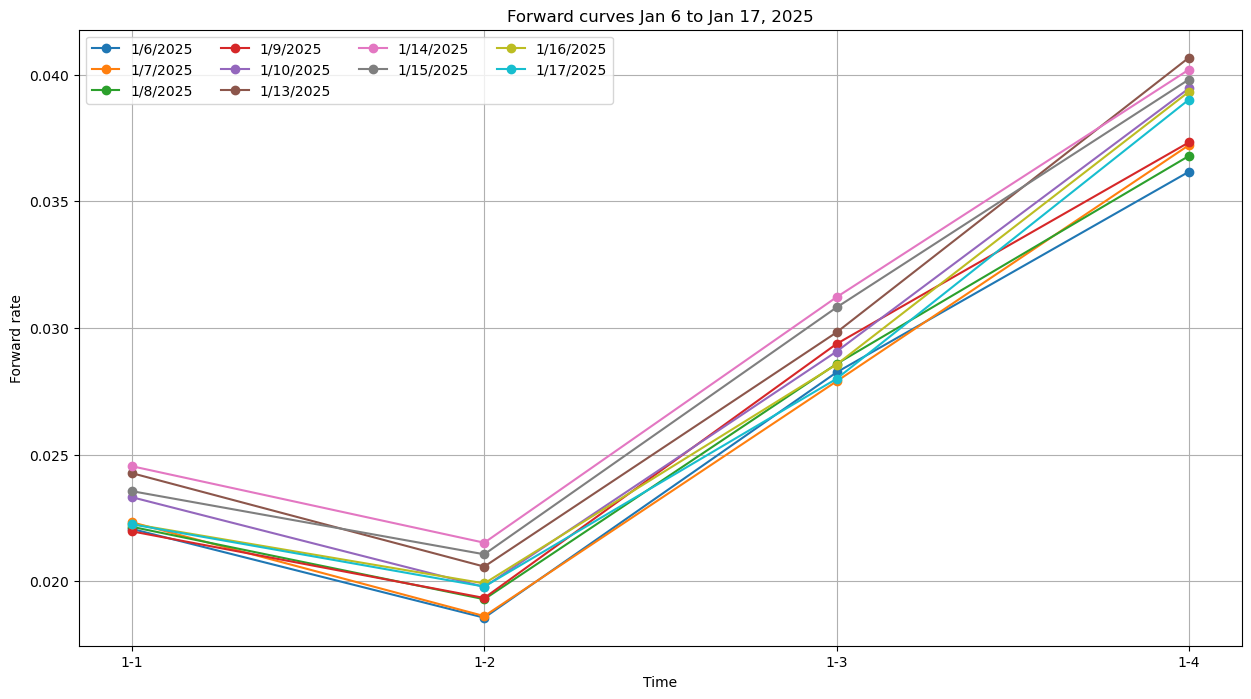

In [16]:
# Plot forward rate
forward_combined = pd.concat([forward1, forward2, forward3, forward4, forward5, forward6, forward7, forward8, forward9, forward10], axis=1)

forward_combined.columns = record_dates

x = ['1-1', '1-2', '1-3', '1-4']

plt.figure(figsize=(15, 8))
for date in forward_combined.columns:
    plt.plot(x, forward_combined[date], marker = 'o', linestyle='-', label = date)

plt.xlabel('Time')
plt.ylabel('Forward rate')
plt.title('Forward curves Jan 6 to Jan 17, 2025')
plt.legend(loc = 'upper left', fontsize = 10, ncol=4)
plt.grid(True)
plt.show()

# Question 5

In [17]:
# Selecting bonds that are mature in september for YTM covariance
filtered_YTM = YTM_combined.iloc[[1, 3, 5, 7, 9]]

filtered_YTM

,1/6/2025,1/7/2025,1/8/2025,1/9/2025,1/10/2025,1/13/2025,1/14/2025,1/15/2025,1/16/2025,1/17/2025
1,0.029956,0.029903,0.030168,0.029956,0.030868,0.031369,0.031484,0.030942,0.029900,0.029513
3,0.028656,0.028814,0.028782,0.028621,0.029742,0.030423,0.030845,0.029973,0.028840,0.028613
5,0.028953,0.029232,0.029313,0.029156,0.030391,0.030960,0.031405,0.030687,0.029488,0.029370
7,0.029276,0.029158,0.029589,0.029732,0.030166,0.031036,0.031913,0.031239,0.029777,0.029484
9,0.029832,0.030013,0.030239,0.030374,0.031270,0.031983,0.032632,0.032003,0.030657,0.030378


In [18]:
# Calculate YTM covariance matrix
log_returns = np.log(filtered_YTM.iloc[:, 1:].values / filtered_YTM.iloc[:, :-1].values)

cov_YTM = np.cov(log_returns, rowvar=True)

cov_YTM

array([[0.00036532, 0.00043811, 0.00043532, 0.00040614, 0.00041134],
       [0.00043811, 0.00057639, 0.00056539, 0.00050703, 0.00052409],
       [0.00043532, 0.00056539, 0.00056414, 0.00049171, 0.00051693],
       [0.00040614, 0.00050703, 0.00049171, 0.00061186, 0.00053501],
       [0.00041134, 0.00052409, 0.00051693, 0.00053501, 0.00051768]])

In [19]:
# Calculate Forward covariance matrix
log_rates = np.log(forward_combined.iloc[:, 1:].values / forward_combined.iloc[:, :-1].values)

cov_forward = np.cov(log_rates, rowvar=True)

cov_forward

array([[1.29651053e-03, 8.92516120e-04, 6.48611997e-04, 7.14816806e-04],
       [8.92516120e-04, 1.06513085e-03, 1.05487770e-03, 2.57353112e-04],
       [6.48611997e-04, 1.05487770e-03, 1.33316116e-03, 8.96552649e-05],
       [7.14816806e-04, 2.57353112e-04, 8.96552649e-05, 6.20424749e-04]])

# Question 6

In [20]:
# Calculate eigenvalues and eigenvectors for YTM covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_YTM)

eigenvalues, eigenvectors

(array([2.47667553e-03, 1.27720077e-04, 2.21096107e-05, 6.23086286e-06,
        2.64923248e-06]),
 array([[-0.37182354, -0.19459384,  0.90309591, -0.07268959,  0.05490444],
        [-0.47318604, -0.35768323, -0.34436024, -0.64311544,  0.34055284],
        [-0.46625445, -0.42257611, -0.21514944,  0.34161272, -0.66411421],
        [-0.46285828,  0.7945184 , -0.0211197 , -0.25017499, -0.30243868],
        [-0.45410487,  0.15609577, -0.13819727,  0.63390218,  0.59033247]]))

In [21]:
# Calculate eigenvalues and eigenvectors for forward covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_forward)

eigenvalues, eigenvectors

(array([3.11335481e-03, 1.04768072e-03, 2.34733813e-05, 1.30718374e-04]),
 array([[ 0.56757647,  0.50916305,  0.55271914, -0.33632052],
        [ 0.5617219 , -0.20890029, -0.66002098, -0.4529917 ],
        [ 0.55176798, -0.57502573,  0.28665508,  0.5317202 ],
        [ 0.24057754,  0.60535862, -0.42036024,  0.63163333]]))